# Stock Price Prediction with LSTM

<img src='images/stock.webp'>

LSTM stands for Long Short Term Memory Networks. It is a type of recurrent neural network that is commonly used for regression and time series forecasting in machine learning. It can memorize data for long periods, which differentiates LSTM neural networks from other neural networks. If you want to learn how to predict stock prices with LSTM, this project is for you. In this project, I will walk you through the task of stock price prediction with LSTM using Python.

In [4]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 100)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [5]:

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

df = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df["Date"] = df.index
df = df[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3439,2024-09-18,217.550003,222.710007,217.539993,220.690002,220.690002,59894900
3440,2024-09-19,224.990005,229.820007,224.630005,228.869995,228.869995,66781300
3441,2024-09-20,229.970001,233.089996,227.619995,228.199997,228.199997,318679900
3442,2024-09-23,227.339996,229.449997,225.809998,226.470001,226.470001,54146000
3443,2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43492700


# EDA - Exploratory Data Anlysis

In [6]:
df.shape

(3444, 7)

In [7]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3444,3444.000000,3444.000000,3444.000000,3444.000000,3444.000000,3.444000e+03
mean,2017-11-19 15:20:41.811846656,71.036157,71.791528,70.317764,71.085522,68.903358,2.062434e+08
min,2011-01-18 00:00:00,11.310000,11.346429,11.089286,11.261429,9.510001,2.404830e+07
25%,2014-06-19 18:00:00,23.549375,23.779910,23.315000,23.549910,20.693962,8.441490e+07
50%,2017-11-16 12:00:00,40.031250,40.478750,39.690001,40.007500,37.681974,1.331806e+08
75%,2021-04-22 06:00:00,130.394997,131.860004,128.860001,130.757496,128.410572,2.647601e+08
max,2024-09-24 00:00:00,236.479996,237.229996,233.089996,234.820007,234.548523,1.880998e+09
std,NaN,61.996023,62.669487,61.371141,62.051402,62.497336,1.894382e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3444 entries, 0 to 3443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3444 non-null   datetime64[ns]
 1   Open       3444 non-null   float64       
 2   High       3444 non-null   float64       
 3   Low        3444 non-null   float64       
 4   Close      3444 non-null   float64       
 5   Adj Close  3444 non-null   float64       
 6   Volume     3444 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 188.5 KB


In [9]:
df.isnull().sum()   

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Visualization

In [10]:
# pip install -U kaleido

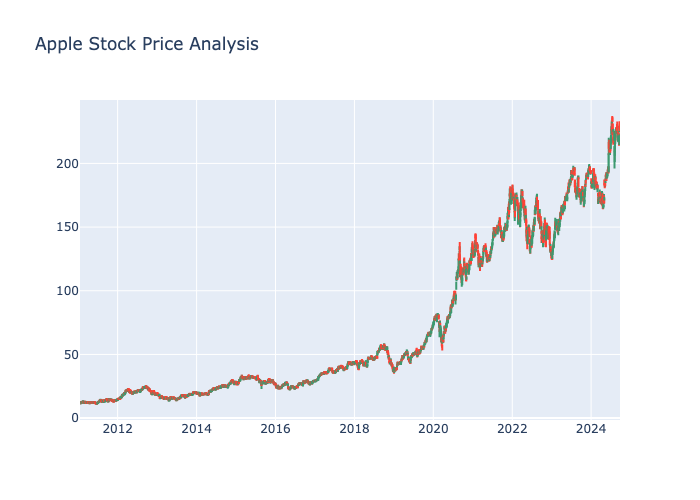

In [11]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"], 
                                        high=df["High"],
                                        low=df["Low"], 
                                        close=df["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show('png')

In [12]:
correlation = df.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999961
High         0.999893
Low          0.999891
Open         0.999768
Date         0.905585
Volume      -0.526846
Name: Close, dtype: float64


In [13]:
x = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=500)

Epoch 1/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7289.4580 - val_loss: 4476.5728
Epoch 2/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3559.3054 - val_loss: 1400.9567
Epoch 3/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 744.6415 - val_loss: 184.9794
Epoch 4/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 125.6904 - val_loss: 73.4812
Epoch 5/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.6966 - val_loss: 32.8414
Epoch 6/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.5816 - val_loss: 23.8325
Epoch 7/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.6075 - val_loss: 12.6617
Epoch 8/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5615 - val_loss: 7.3507
Epoch 9/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8539 - val_loss: 6.1410
Epoch 10/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6771 - val_loss: 3.6192
Epoch 11/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3646 - val_loss: 3.6834
Epoch 12/500
87/87 ━━━━━━━━━━━━━━━━━━━

In [17]:
pred = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, pred)

0.9997372421140572

In [19]:
mean_squared_error(y_test, pred)

1.0827638962717712

In [20]:
loss_f = pd.DataFrame(history.history)

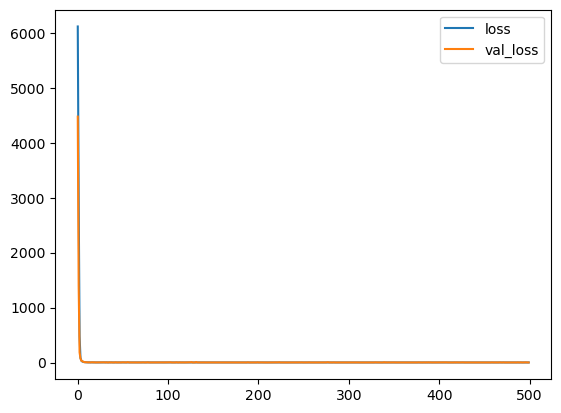

In [21]:
loss_f.plot();

In [22]:
import numpy as np
#features = [Open, High, Low, Volume]
features = np.array([[177.089996, 180.419998, 177.070007, 74919600]])
model.predict(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[177.51842]], dtype=float32)

In [23]:
from joblib import dump
dump(model, "model.joblib")

['model.joblib']